In [100]:
#h pip installs shap package! 
! pip install shap

     |████████████████████████████████| 371 kB 1.9 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 40 kB 2.1 MB/s            
  Created wheel for shap: filename=shap-0.40.0-cp38-cp38-macosx_10_9_x86_64.whl size=433790 sha256=ede809ea1313be976cc8c8f0f89a53d41994444d6e312911811c89b954e0a7d1
  Stored in directory: /Users/anguyen/Library/Caches/pip/wheels/77/07/6b/ff54f2fdec86581ea5f6131ec0fd424bef58841d6684035114
Successfully built shap
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import shap 

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

# Variables 
* `sequence_ID`: ID of participants
* `sex_isFemale`: binary variable for whether a participant is female (female = 1, male = 0)
* `race`: variable to indicate a participant's self-identified race
* `poverty_index`: variable to indicate socioeconomic status (SES)
* `age`: age at the time of initial survey between 1971 and 1975
* `serum_albumin`: measures the amount of  albumen in clear liquid portion of blood
* `alkaline_phosphatase`: measures the quanityt of enzyme ALP in body 
* `SGOT`: measure of liver function 
* `BUN`: measure of kidney function 
* `calcium`
* `creatinine`
* `potassium`
* `sodium`
* `total_bilirubin`
* `serum_protein`
* `red_blood_cells`
* `white_blood_cells`
* `hemoglobin`
* `hematocrit`
* `platelets_estimate`
* `segmented_neutrophils`
* `lymphocytes`
* `monocytes`
* `eosinophils`
* `basophils`
* `band_neutrophils`
* `cholesterol`
* `serum_iron`
* `serum_magnesium`
* `total_iron_binding_capacity`
* `tranferrin_saturation`
* `urine_albumin`
* `urine_glucose`
* `urine_pH`
* `urine_hematest`
* `sedimentation_rate`
* `uric_acid`
* `systolic_blood_pressure`
* `pulse_pressure`
* `weight`: weight of partcipant 
* `height`: height of participant 
* `y` 
* `y_recode`
* `age_at_death`

In [218]:
#load data 
df = pd.read_csv('Project_B_NHANESI_full.csv')
#data processing 
df['gender'] = np.where(df['sex_isFemale'] == True, 'female','male')
df['race'] = np.where(df['race'] == 1, 'race_1',np.where(df['race'] == 2, 'race_2', 'race_3'))
# if y is positive, we know they have died 
df['y_recode'] = np.where(df['y'] > 0, 0,1)
# if y is positive, we can compute the age of death based on age and y (time that has elapsed) since survey
df['age_at_death'] = np.where(df['y'] > 0, df['age'] + df['y'], 0)


#pre-process
categorical_cols = ['gender','race','platelets_estimate','urine_albumin','urine_glucose','urine_hematest']
one_hot_df = pd.get_dummies(df[categorical_cols])

# Drop old columns and rejoin processed column 
df = df.drop(categorical_cols,axis = 1)
df = df.drop('sex_isFemale',axis=1)
df = df.join(one_hot_df)


# divide y: smaller negative y (lost track of), 
df1 = df[df['y'] > 0]


<AxesSubplot:xlabel='y', ylabel='Count'>

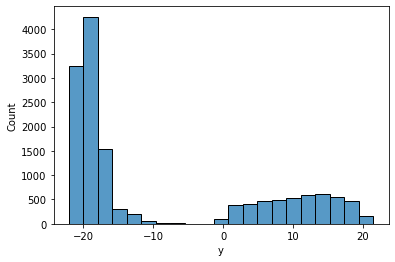

In [219]:
sns.histplot(df['y'])

In [220]:
df1.corr().sort_values(by='age_at_death',ascending=False,key=abs).head(20)

,sequence_ID,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,...,urine_glucose_Medium,urine_glucose_Negative,urine_glucose_Trace,urine_glucose_Verydark,urine_hematest_Large,urine_hematest_Moderate,urine_hematest_Negative,urine_hematest_Small,urine_hematest_Trace,urine_hematest_Verylarge
age_at_death,-0.035312,0.019065,0.898789,-0.104291,-0.017627,-0.123069,0.234675,-0.100334,0.096263,0.038480,...,0.000678,-0.007193,0.016998,-0.015401,-0.073565,-0.043593,0.004953,0.003892,NaN,NaN
age,-0.013005,-0.011282,1.000000,-0.166573,0.002691,-0.121448,0.270644,-0.096809,0.134824,0.057825,...,0.008394,-0.038446,0.029765,0.000747,-0.071601,-0.033878,-0.008770,-0.001289,NaN,NaN
y,-0.052303,0.065933,-0.100778,0.116895,-0.046105,-0.021906,-0.063661,-0.023101,-0.086960,-0.043791,...,-0.016429,0.065972,-0.025136,-0.036550,-0.013687,-0.026415,0.030012,0.011591,NaN,NaN
pulse_pressure,-0.071410,-0.064733,0.369314,-0.036141,0.060790,-0.026060,0.066923,-0.064115,0.060389,-0.161312,...,0.031610,-0.076184,0.010315,0.059685,-0.027478,-0.012311,-0.016554,0.001437,NaN,NaN
systolic_blood_pressure,-0.043870,-0.078508,0.299642,0.003796,0.060251,0.010981,0.039737,0.007869,0.099047,-0.174670,...,0.029067,-0.075425,0.022686,0.056437,-0.015749,-0.012530,-0.021735,0.010912,NaN,NaN
BUN,0.019827,NaN,0.270644,NaN,-0.117306,-0.044779,1.000000,0.063909,0.474836,0.140298,...,-0.023043,-0.050100,NaN,-0.034959,-0.047030,0.052564,-0.057999,-0.021231,NaN,NaN
total_iron_binding_capacity,0.024984,-0.022082,-0.205453,0.224468,0.009635,0.056515,NaN,0.216230,NaN,NaN,...,0.020405,-0.005713,-0.005186,0.008039,-0.014052,-0.028711,0.013747,-0.020971,NaN,NaN
height,0.027897,0.116142,-0.145728,0.067616,-0.045716,0.106333,-0.045604,-0.011300,0.200322,0.089436,...,0.017743,0.027711,0.014776,-0.019476,-0.011280,0.004666,0.036101,-0.023806,NaN,NaN
cholesterol,0.029394,0.026871,0.142623,0.134862,0.001967,-0.047081,0.095959,0.199364,0.035203,0.045646,...,0.000212,0.023169,-0.008378,0.004278,-0.015394,-0.010138,0.037840,-0.012324,NaN,NaN
platelets_estimate_Normal,0.212340,0.046598,-0.124088,-0.003618,0.003282,-0.019529,0.010242,0.002966,-0.071802,0.033862,...,-0.018764,0.044180,-0.015979,0.025554,-0.013366,-0.002720,0.055341,-0.010778,NaN,NaN


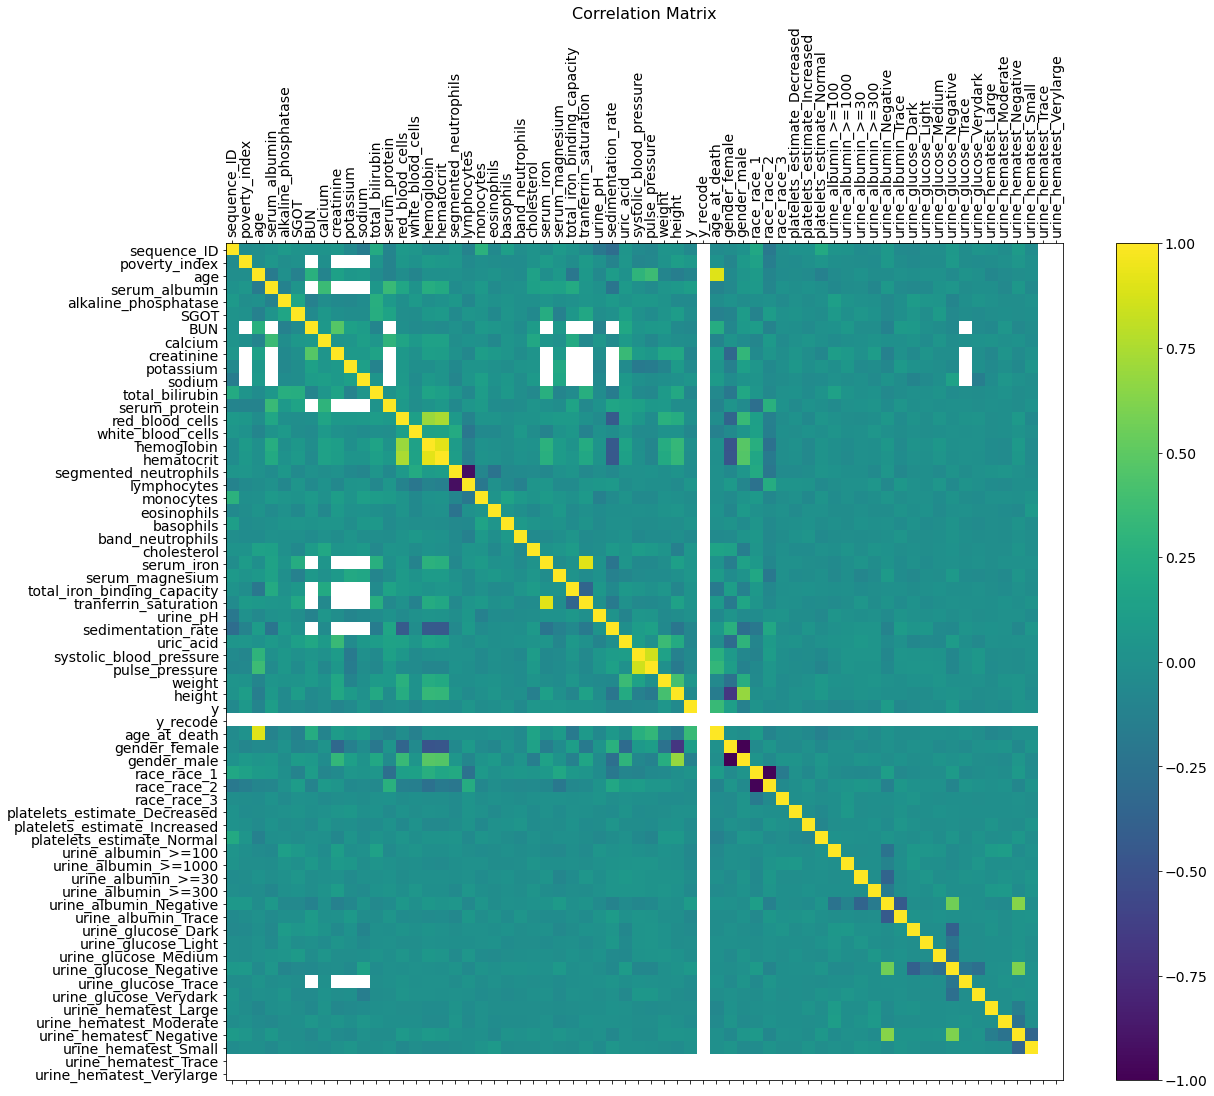

In [221]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [223]:
df1.columns

Index(['sequence_ID', 'poverty_index', 'age', 'serum_albumin',
       'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium', 'creatinine',
       'potassium', 'sodium', 'total_bilirubin', 'serum_protein',
       'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit',
       'segmented_neutrophils', 'lymphocytes', 'monocytes', 'eosinophils',
       'basophils', 'band_neutrophils', 'cholesterol', 'serum_iron',
       'serum_magnesium', 'total_iron_binding_capacity',
       'tranferrin_saturation', 'urine_pH', 'sedimentation_rate', 'uric_acid',
       'systolic_blood_pressure', 'pulse_pressure', 'weight', 'height', 'y',
       'y_recode', 'age_at_death', 'gender_female', 'gender_male',
       'race_race_1', 'race_race_2', 'race_race_3',
       'platelets_estimate_Decreased', 'platelets_estimate_Increased',
       'platelets_estimate_Normal', 'urine_albumin_>=100',
       'urine_albumin_>=1000', 'urine_albumin_>=30', 'urine_albumin_>=300',
       'urine_albumin_Negative', 'urine_alb

In [224]:
#choose predictors with absolute value of >= 0.05 correlation 

predictors = [
    'gender_female', 'gender_male',
       'race_race_1', 'race_race_2', 'race_race_3',
            'poverty_index',
       
              'weight',
              'height',
              'pulse_pressure',
              'systolic_blood_pressure',
              'cholesterol',
              'BUN',
              'creatinine',   
             'serum_magnesium',
             'sodium',
             'tranferrin_saturation',
             'sedimentation_rate',
            'total_iron_binding_capacity',
            'SGOT',
            'white_blood_cells',
            'serum_protein', 
            'serum_albumin', 
            'calcium', 
            'total_bilirubin',
    'platelets_estimate_Decreased', 'platelets_estimate_Increased',
       'platelets_estimate_Normal', 'urine_albumin_>=100',
       'urine_albumin_>=1000', 'urine_albumin_>=30', 'urine_albumin_>=300',
       'urine_albumin_Negative', 'urine_albumin_Trace', 'urine_glucose_Dark',
       'urine_glucose_Light', 'urine_glucose_Medium', 'urine_glucose_Negative',
       'urine_glucose_Trace', 'urine_glucose_Verydark', 'urine_hematest_Large',
       'urine_hematest_Moderate', 'urine_hematest_Negative',
       'urine_hematest_Small', 'urine_hematest_Trace',
       'urine_hematest_Verylarge'
]
# test train split
X = df1[predictors]
y = df1['age_at_death'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

# missing data imputation using KNN: fits on train, transforms train and test
imputer = KNNImputer(n_neighbors=3)
imputer.fit(X_train)
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# baseline model: linear regression 
print("Linear Regression:")
reg = LinearRegression().fit(X_train_imputed, y_train)
#reg = linear_model.BayesianRidge().fit(X_train_imputed, y_train)


print(reg.score(X_train_imputed, y_train))
print(reg.score(X_test_imputed, y_test))

lin_reg_betas = pd.DataFrame(np.append(reg.intercept_,reg.coef_),index=['intercept'] + predictors)

display(lin_reg_betas.sort_values(0,ascending=False))


#baseline 2: random forest regressor
print("Random Forest Regressor:")
rf_regr = RandomForestRegressor(n_estimators=100,max_depth=3, random_state=42)
rf_regr.fit(X_train_imputed, y_train)
print(rf_regr.score(X_train_imputed, y_train))
print(rf_regr.score(X_test_imputed, y_test))


# default feature importance for random forest regressor
fi = pd.DataFrame({'feature': predictors,
                   'importance': rf_regr.feature_importances_}).sort_values('importance', ascending = False)

display(fi)

Linear Regression:
0.23926795747111218
0.2531237823280508


,0
race_race_1,7.183034e+10
race_race_2,7.183034e+10
race_race_3,7.183034e+10
gender_male,4.472954e+07
gender_female,4.472953e+07
urine_albumin_>=30,1.586026e+01
urine_albumin_Negative,1.498719e+01
urine_albumin_Trace,1.397934e+01
urine_albumin_>=300,9.522475e+00
urine_albumin_>=100,8.634938e+00


Random Forest Regressor:
0.22588091149408795
0.19004599841981473


,feature,importance
8,pulse_pressure,0.606179
10,cholesterol,0.094091
17,total_iron_binding_capacity,0.052547
7,height,0.050448
9,systolic_blood_pressure,0.034887
15,tranferrin_saturation,0.030351
21,serum_albumin,0.020465
19,white_blood_cells,0.020135
11,BUN,0.016144
1,gender_male,0.014268


In [225]:
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(rf_regr)

In [226]:
display(X_test.loc[[1560]])
display(y_test[0])
# Calculate Shap values
choosen_instance = X_test.loc[[1560]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
#explainer.expected_value[0]
shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance)

,gender_female,gender_male,race_race_1,race_race_2,race_race_3,poverty_index,weight,height,pulse_pressure,systolic_blood_pressure,...,urine_glucose_Medium,urine_glucose_Negative,urine_glucose_Trace,urine_glucose_Verydark,urine_hematest_Large,urine_hematest_Moderate,urine_hematest_Negative,urine_hematest_Small,urine_hematest_Trace,urine_hematest_Verylarge
1560,0,1,1,0,0,408.0,86.3,181.8,48.0,134.0,...,0,1,0,0,0,0,1,0,0,0


73.37534246575343

* Cholesterol and pulse pressure have the largest impact on age of death, with a prediction of 71.68 for age of death compared to a base value of 72.59 for age of death
* Having cholesterol levels of 241 leads to higher age of death whereas having pulse pressure of 48 will decrease age of death. 

In [227]:
display(X_test.loc[[1939]])
# Calculate Shap values
choosen_instance = X_test.loc[[1939]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
#explainer.expected_value[0]
shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance)

,gender_female,gender_male,race_race_1,race_race_2,race_race_3,poverty_index,weight,height,pulse_pressure,systolic_blood_pressure,...,urine_glucose_Medium,urine_glucose_Negative,urine_glucose_Trace,urine_glucose_Verydark,urine_hematest_Large,urine_hematest_Moderate,urine_hematest_Negative,urine_hematest_Small,urine_hematest_Trace,urine_hematest_Verylarge
1939,0,1,0,1,0,390.0,81.31,167.0,90.0,178.0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
# Explores: Is a person dead? What factors are most related with death? 
from sklearn.linear_model import LogisticRegressionCV
predictors = [
               'gender_female', 'gender_male',
       'race_race_1', 'race_race_2', 'race_race_3',
            'poverty_index',
       
              'weight',
              'height',
              'pulse_pressure',
              'systolic_blood_pressure',
              'cholesterol',
              'BUN',
              'creatinine',   
             'serum_magnesium',
             'sodium',
             'tranferrin_saturation',
             'sedimentation_rate',
            'total_iron_binding_capacity',
            'SGOT',
            'white_blood_cells',
            'serum_protein', 
            'serum_albumin', 
            'calcium', 
            'total_bilirubin',
    'platelets_estimate_Decreased', 'platelets_estimate_Increased',
       'platelets_estimate_Normal', 'urine_albumin_>=100',
       'urine_albumin_>=1000', 'urine_albumin_>=30', 'urine_albumin_>=300',
       'urine_albumin_Negative', 'urine_albumin_Trace', 'urine_glucose_Dark',
       'urine_glucose_Light', 'urine_glucose_Medium', 'urine_glucose_Negative',
       'urine_glucose_Trace', 'urine_glucose_Verydark', 'urine_hematest_Large',
       'urine_hematest_Moderate', 'urine_hematest_Negative',
       'urine_hematest_Small', 'urine_hematest_Trace',
       'urine_hematest_Verylarge'
]
# test train split
X = df[predictors]
y = df['y_recode'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

#missing data imputation using KNN: fits on train, transforms train and test
imputer = KNNImputer(n_neighbors=3)
imputer.fit(X_train)
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

#fit a lasso-like logistic regression 
logit_lasso = LogisticRegressionCV(Cs=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
                                   cv=10,
                                   solver='liblinear',
                                   random_state=50,
                                   scoring='accuracy',
                                   penalty='l1',
                                   max_iter=1000).fit(X_train_imputed, y_train)

print("Coefficients:",logit_lasso.coef_)
print("Intercept:",logit_lasso.intercept_)
print("Train Accuracy score:",accuracy_score(y_train, logit_lasso.predict(X_train_imputed)))
print("Test Accuracy score:",accuracy_score(y_test, logit_lasso.predict(X_test_imputed)))
print("Best C",logit_lasso.C_)



In [7]:
# missing values
df.isnull().sum()

sequence_ID                        0
sex_isFemale                       0
race                               0
poverty_index                   3059
age                                0
serum_albumin                   3606
alkaline_phosphatase            8043
SGOT                            8092
BUN                            11472
calcium                         8151
creatinine                     11816
potassium                      11415
sodium                         11404
total_bilirubin                 8553
serum_protein                   3607
red_blood_cells                 3894
white_blood_cells               1448
hemoglobin                      1034
hematocrit                       776
platelets_estimate              8557
segmented_neutrophils           8553
lymphocytes                     8553
monocytes                       8553
eosinophils                     8553
basophils                       8553
band_neutrophils                8553
cholesterol                      437
s

In [3]:
df[df['y'] > 0].mean()

sequence_ID                    11626.486317
sex_isFemale                       0.471903
race                               1.207019
poverty_index                    260.303169
age                               61.850010
serum_albumin                      4.288521
alkaline_phosphatase              67.447729
SGOT                               2.642507
BUN                               16.052632
calcium                            9.665850
creatinine                         1.061049
potassium                          4.127107
sodium                           142.389803
total_bilirubin                    0.508986
serum_protein                      7.127441
red_blood_cells                    4.742514
white_blood_cells                  7.530297
hemoglobin                        14.562261
hematocrit                        43.419563
segmented_neutrophils             58.581776
lymphocytes                       35.955607
monocytes                          2.935164
eosinophils                     

In [4]:
df[df['y'] < 0].mean()

sequence_ID                    13847.152807
sex_isFemale                       0.658836
race                               1.158212
poverty_index                    299.781676
age                               42.523181
serum_albumin                      4.402030
alkaline_phosphatase              57.287150
SGOT                               2.342651
BUN                               14.494629
calcium                            9.673100
creatinine                         0.994312
potassium                          4.054462
sodium                           142.362004
total_bilirubin                    0.515654
serum_protein                      7.093091
red_blood_cells                    4.707813
white_blood_cells                  7.448676
hemoglobin                        14.276340
hematocrit                        42.407306
segmented_neutrophils             58.087397
lymphocytes                       36.311444
monocytes                          3.247948
eosinophils                     

In [66]:
df[df['y'] < 0].isnull().sum()

sequence_ID                       0
sex_isFemale                      0
race                              0
poverty_index                  2438
age                               0
serum_albumin                  2774
alkaline_phosphatase           5083
SGOT                           5116
BUN                            7274
calcium                        5159
creatinine                     7563
potassium                      7233
sodium                         7225
total_bilirubin                5423
serum_protein                  2774
red_blood_cells                2559
white_blood_cells               899
hemoglobin                      643
hematocrit                      477
platelets_estimate             5482
segmented_neutrophils          5478
lymphocytes                    5478
monocytes                      5478
eosinophils                    5478
basophils                      5478
band_neutrophils               5478
cholesterol                     269
serum_iron                  

In [67]:
df.columns

Index(['sequence_ID', 'sex_isFemale', 'race', 'poverty_index', 'age',
       'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium',
       'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein',
       'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit',
       'platelets_estimate', 'segmented_neutrophils', 'lymphocytes',
       'monocytes', 'eosinophils', 'basophils', 'band_neutrophils',
       'cholesterol', 'serum_iron', 'serum_magnesium',
       'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_albumin',
       'urine_glucose', 'urine_pH', 'urine_hematest', 'sedimentation_rate',
       'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight',
       'height', 'y'],
      dtype='object')

In [68]:
print("Number of observations:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of observations: 14407
Number of columns: 42


In [69]:
df.describe()

,sequence_ID,sex_isFemale,race,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,...,total_iron_binding_capacity,tranferrin_saturation,urine_pH,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,y
count,14407.000000,14407.000000,14407.000000,11348.000000,14407.000000,10801.000000,6364.000000,6315.000000,2935.000000,6256.00000,...,10149.000000,9932.000000,13695.000000,10308.000000,6651.000000,14339.000000,14335.000000,14338.000000,14361.000000,14407.000000
mean,13109.294093,0.596724,1.174429,285.288597,48.944888,4.360467,60.204085,2.428643,14.807291,9.67102,...,362.766184,28.555910,5.631179,16.182383,5.526643,134.169607,50.667388,70.993984,166.254836,-9.109808
std,7376.747797,0.490572,0.407539,223.320839,15.589963,0.329382,25.888013,1.489863,4.463475,0.47855,...,59.968864,11.232671,0.774016,11.481789,1.470401,24.411942,18.027675,15.751339,9.175197,14.398436
min,1.000000,0.000000,1.000000,2.000000,25.000000,2.700000,4.800000,0.270000,0.800000,0.20000,...,112.000000,3.200000,5.000000,1.000000,0.700000,80.000000,10.000000,27.900000,132.800000,-22.060274
25%,6711.500000,0.000000,1.000000,129.000000,35.000000,4.200000,45.000000,1.800000,12.000000,9.40000,...,322.000000,21.000000,5.000000,7.000000,4.500000,118.000000,38.000000,59.530000,159.500000,-19.885246
50%,13313.000000,1.000000,1.000000,229.000000,48.000000,4.400000,57.000000,2.200000,14.000000,9.70000,...,356.000000,27.200000,5.000000,14.000000,5.400000,130.000000,48.000000,69.170000,165.500000,-18.028288
75%,19835.500000,1.000000,1.000000,358.000000,65.000000,4.600000,70.000000,2.600000,17.000000,10.00000,...,396.000000,34.600000,6.000000,22.000000,6.500000,148.000000,60.000000,80.290000,172.700000,6.179078
max,25061.000000,1.000000,3.000000,999.000000,75.000000,5.700000,580.000000,31.000000,49.000000,12.50000,...,717.000000,100.000000,9.000000,72.000000,12.500000,270.000000,170.000000,181.440000,205.000000,21.474220


0 12053 0.8366072048309849
1 2195 0.15235649337127785
2 159 0.011036301797737211


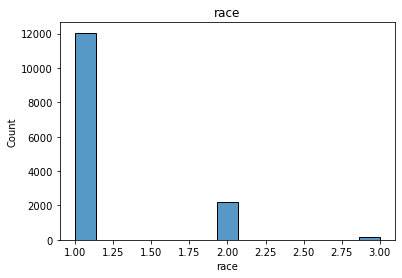

In [70]:
#distribution by race 
for i in enumerate(df.groupby('race').size()):
    print(i[0], i[1], i[1]/len(df))
    
sns.histplot(data=df, x='race').set_title('race');

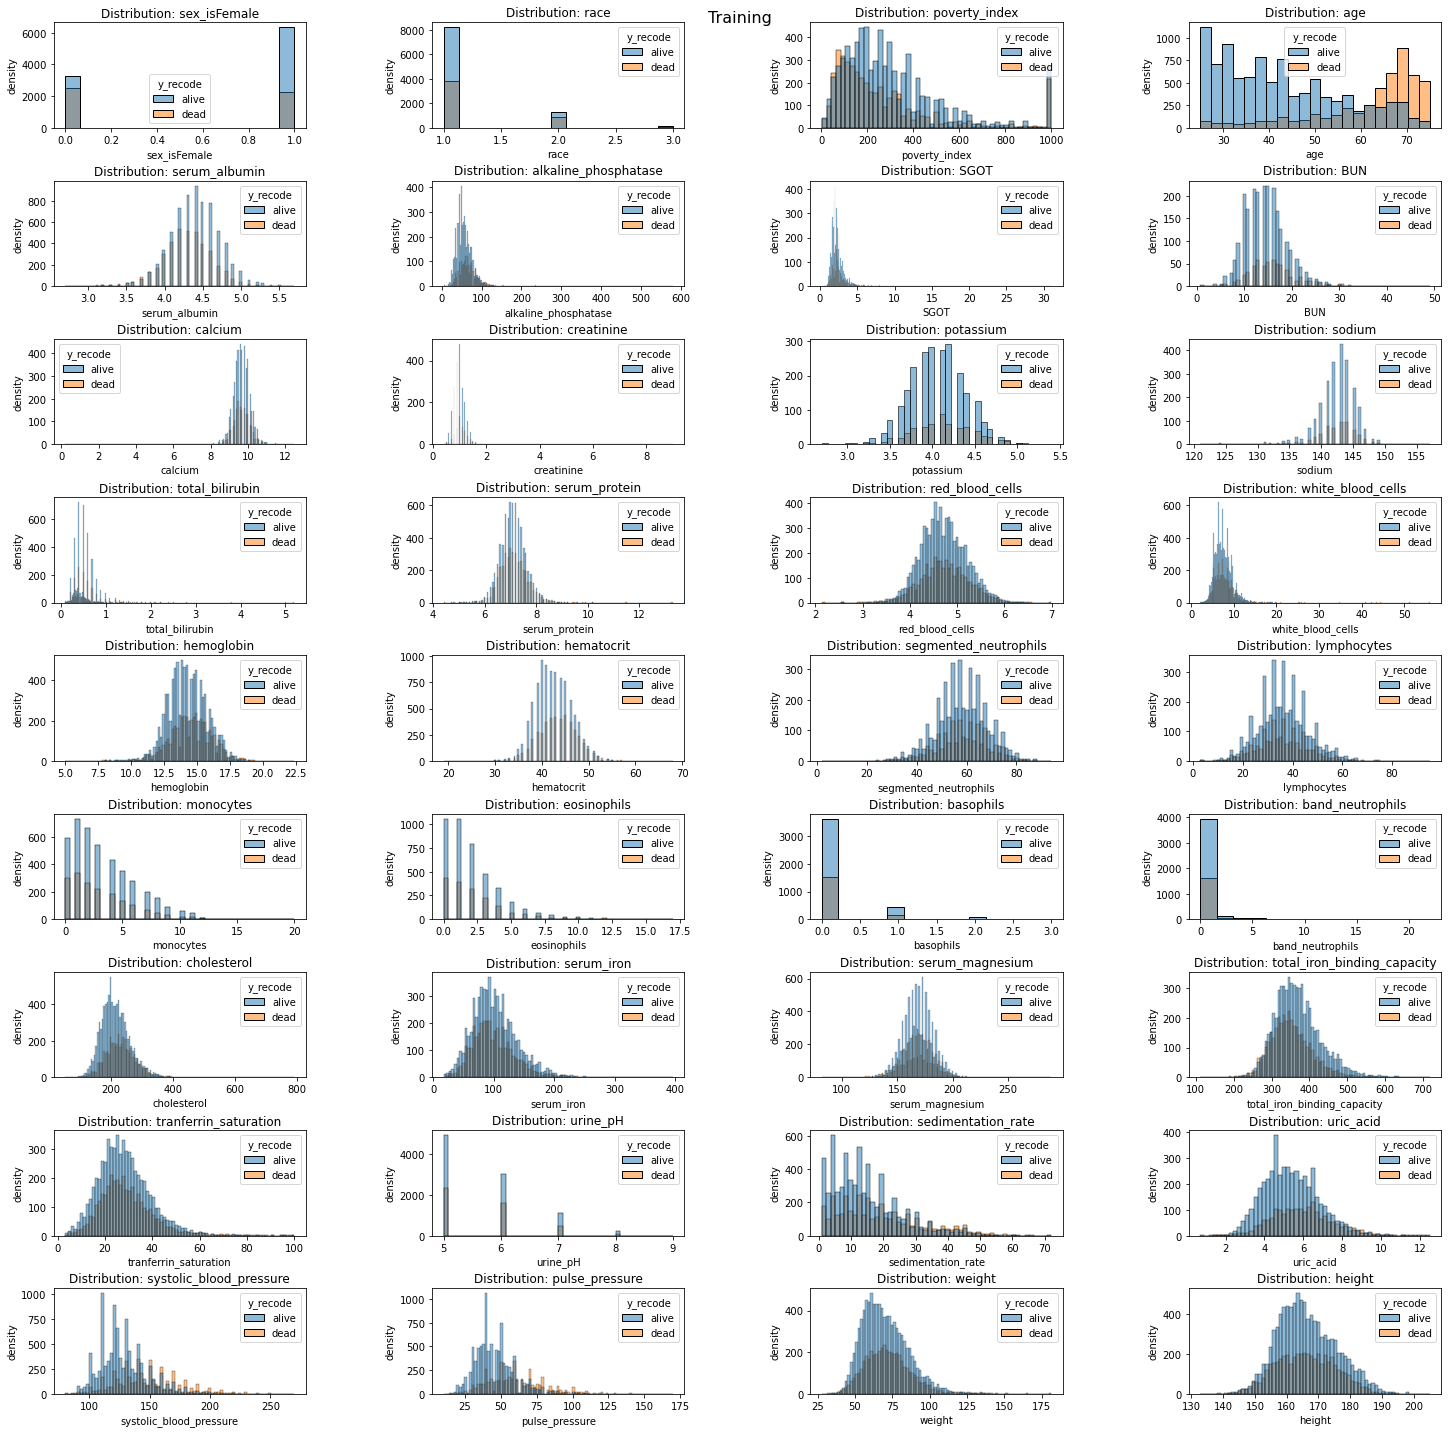

In [157]:
#defines figure and axs
fig, axs = plt.subplots(nrows=9,ncols=4,figsize=(20,20))
fig.suptitle("Training", fontsize=16)
fig.tight_layout()
#adds spacing
fig.subplots_adjust(hspace=0.5,wspace=0.5)

predictors = ['sex_isFemale', 'race', 'poverty_index', 'age',
       'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium',
       'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein',
       'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'segmented_neutrophils', 'lymphocytes',
       'monocytes', 'eosinophils', 'basophils', 'band_neutrophils',
       'cholesterol', 'serum_iron', 'serum_magnesium',
       'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_pH', 'sedimentation_rate',
       'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight',
       'height']

#enumerates across axs 
for i, ax in enumerate(axs.flatten()):
    sns.histplot(data=df,x=predictors[i],hue='y_recode',ax=ax)
    title = 'Distribution: {}'.format(predictors[i])
    ax.title.set_text(title)
    ax.set_xlabel(predictors[i])
    ax.set_ylabel('density')
    
plt.show()

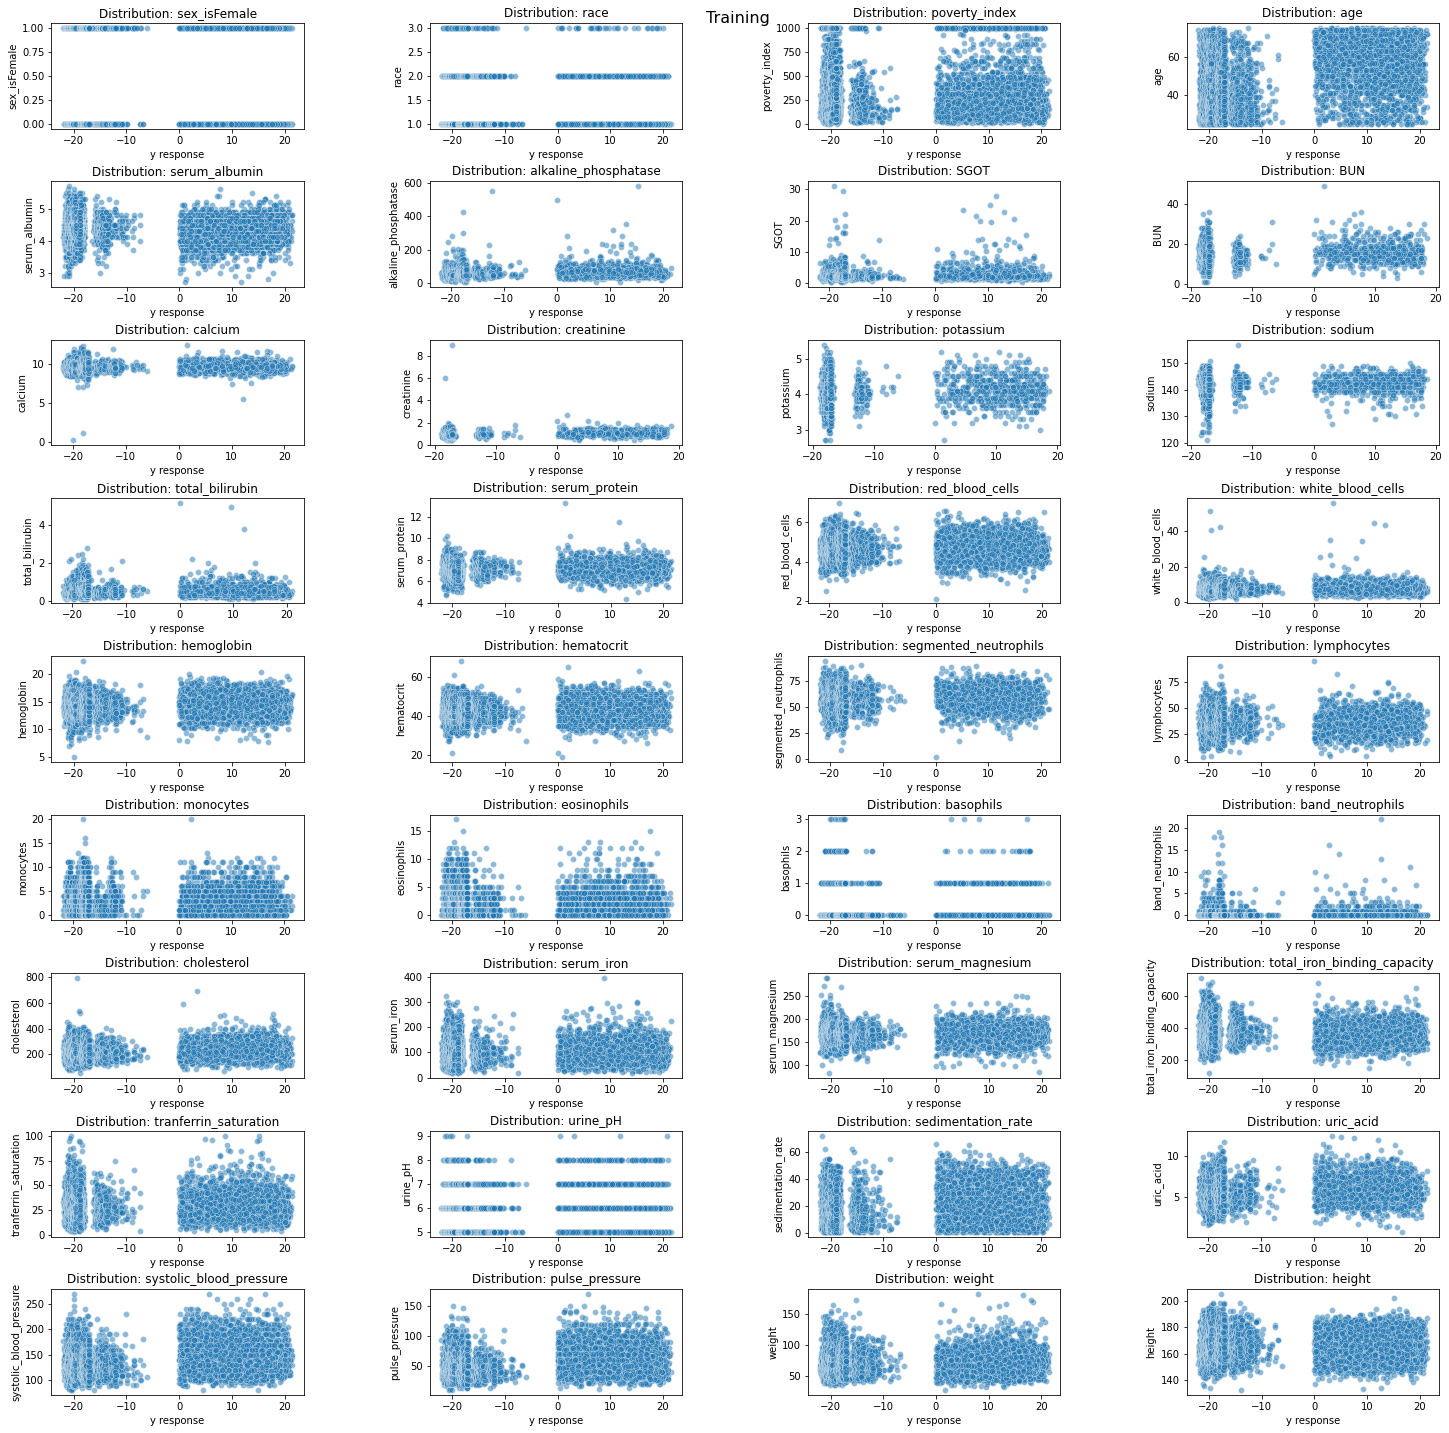

In [165]:
#defines figure and axs
fig, axs = plt.subplots(nrows=9,ncols=4,figsize=(20,20))
fig.suptitle("Training", fontsize=16)
fig.tight_layout()
#adds spacing
fig.subplots_adjust(hspace=0.5,wspace=0.5)

predictors = ['sex_isFemale', 'race', 'poverty_index', 'age',
       'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium',
       'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein',
       'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'segmented_neutrophils', 'lymphocytes',
       'monocytes', 'eosinophils', 'basophils', 'band_neutrophils',
       'cholesterol', 'serum_iron', 'serum_magnesium',
       'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_pH', 'sedimentation_rate',
       'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight',
       'height']

#enumerates across axs 
for i, ax in enumerate(axs.flatten()):
    sns.scatterplot(data=df,x='y',y=predictors[i],ax=ax,alpha=0.5)
    title = 'Distribution: {}'.format(predictors[i])
    ax.title.set_text(title)
    ax.set_xlabel('y response')
    ax.set_ylabel(predictors[i])
    
plt.show()

47.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
64.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


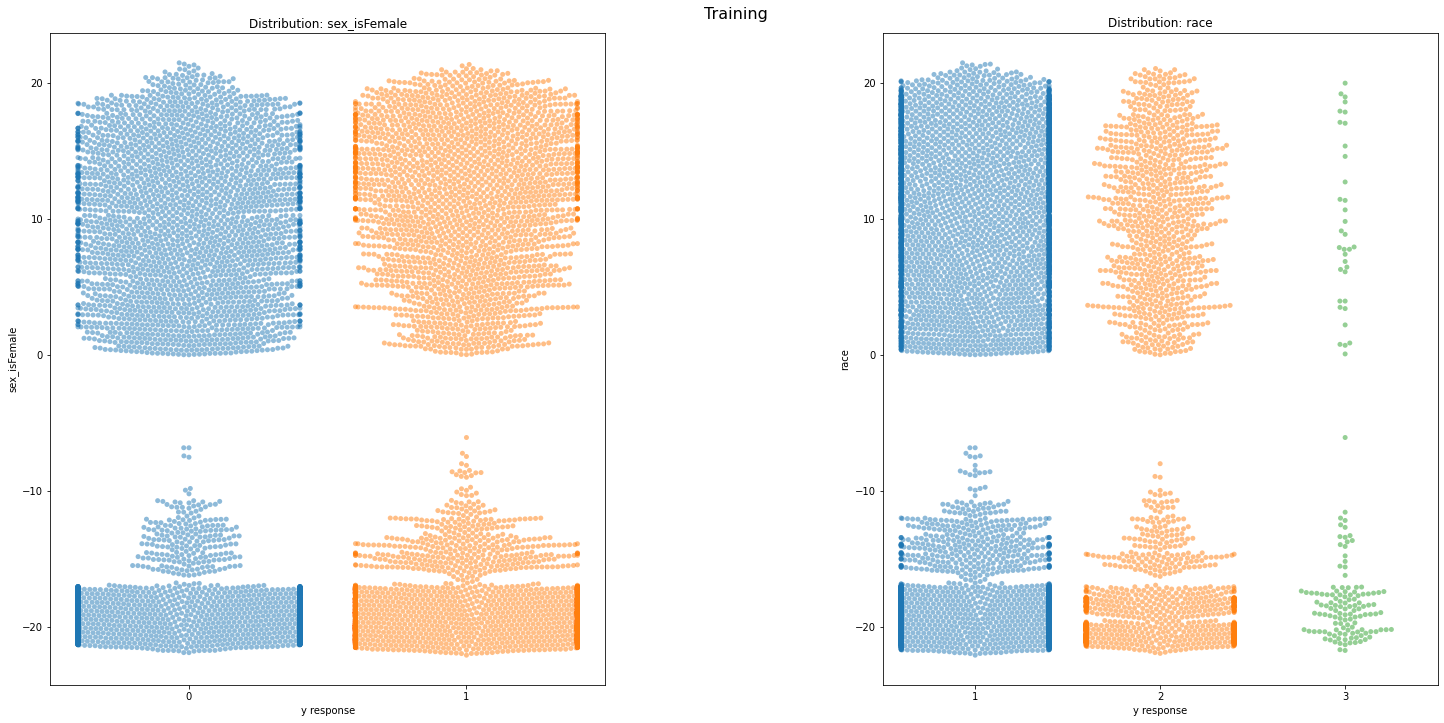

In [171]:
#defines figure and axs
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
fig.suptitle("Training", fontsize=16)
fig.tight_layout()
#adds spacing
fig.subplots_adjust(hspace=0.5,wspace=0.5)

predictors = ['sex_isFemale', 'race']

#enumerates across axs 
for i, ax in enumerate(axs.flatten()):
    sns.swarmplot(data=df,x=predictors[i],y='y',ax=ax,alpha=0.5)
    title = 'Distribution: {}'.format(predictors[i])
    ax.title.set_text(title)
    ax.set_xlabel('y response')
    ax.set_ylabel(predictors[i])
    
plt.show()

In [73]:
from sklearn.model_selection import train_test_split

X = df[['age',
#        'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium',
#        'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein',
#        'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'segmented_neutrophils', 'lymphocytes',
#        'monocytes', 'eosinophils', 'basophils', 'band_neutrophils',
#        'cholesterol', 'serum_iron', 'serum_magnesium',
#        'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_pH', 'sedimentation_rate',
#        'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 
        'weight',
       'height']]
y = df['y'].values
X_train, y_train, x_test, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import accuracy_score
# lg = LinearRegression()
# lg.fit(X_train,y_train)

# accuracy_score(y_train, lg.predict(X_train))